In [36]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr
import matplotlib

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (16,8)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError, URLError
import urllib.parse
from bs4 import BeautifulSoup
import requests

In [15]:
# 삼성전자(005930) 전체 (1996-11-05 ~ 현재)
df = fdr.DataReader('005930')
df

Open   High    Low  Close    Volume    Change
Date                                                      
1998-05-04   1266   1275   1230   1240    274250       NaN
1998-05-06   1219   1239   1204   1210    312220 -0.024194
1998-05-07   1213   1245   1210   1233    316361  0.019008
1998-05-08   1213   1232   1200   1210    333190 -0.018654
1998-05-09   1210   1225   1210   1216     64040  0.004959
...           ...    ...    ...    ...       ...       ...
2022-07-01  56900  57500  55900  56200  24982097 -0.014035
2022-07-04  56100  57400  55700  57100  17807126  0.016014
2022-07-05  57600  58200  57200  57200  14216539  0.001751
2022-07-06  57300  57300  56400  56400  16820461 -0.013986
2022-07-07  56400  58700  56300  58200  21065788  0.031915

[6000 rows x 6 columns]

In [89]:
# df = fdr.DataReader('KS11', '2016-01-04', '2021-12-31')
# df_kr = df.drop(['Low','High','Open'], axis=1)
# df_kr

# df_kr.to_csv("2016_2021코스피.csv")

# df = fdr.DataReader('KQ11', '2016-01-04', '2021-12-31')
# df.drop(['Open'], axis=1)
# df.drop(['High'], axis=1)
# df_na = df.drop(['Low','High','Open'], axis=1)
# df_na

# df_na.to_csv("2016_2021나스닥.csv")


<AxesSubplot:xlabel='Date'>

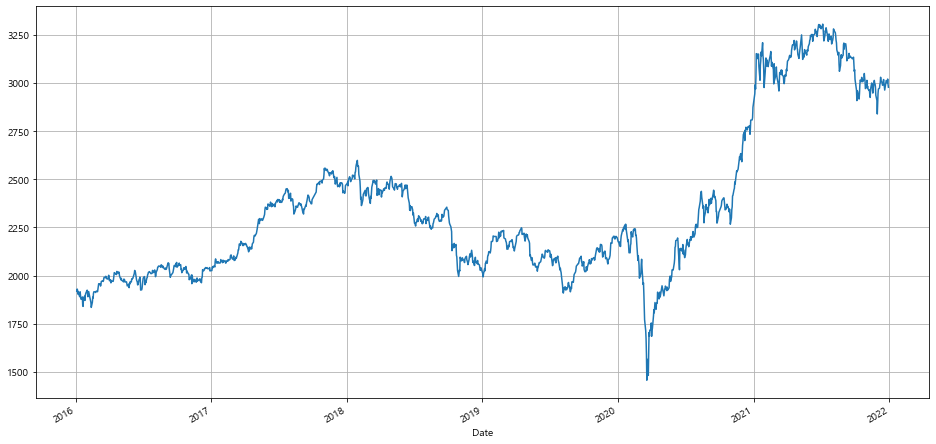

In [37]:
ks11 = fdr.DataReader('KS11', '2016-01-04', '2021-12-31',data_source='close')
ks11['Close'].plot()

<AxesSubplot:xlabel='Date'>

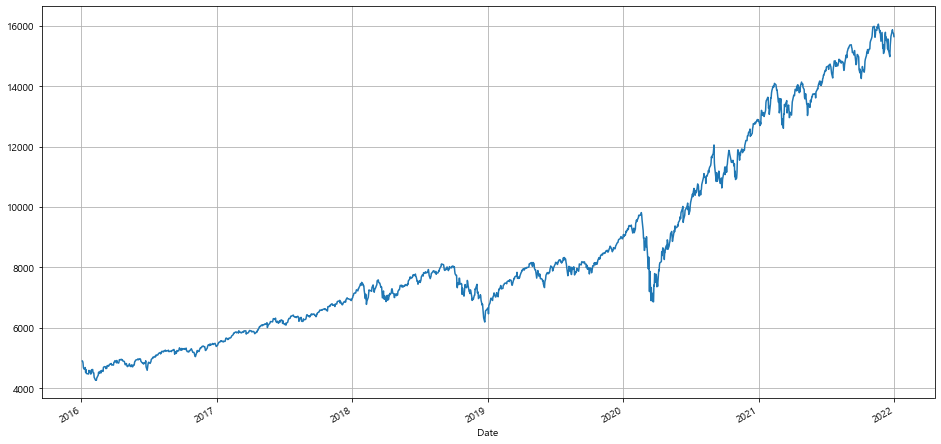

In [38]:
IXIC = fdr.DataReader('IXIC', '2016-01-04', '2021-12-31',data_source='close')
IXIC['Close'].plot()

In [63]:
#stock_list = ks11['Close'],IXIC['Close']

In [67]:
# df_list = [fdr.DataReader(code, '2016-01-01', '2021-12-31')['Close'] for name, code in stock_list]
# df_list

In [66]:
# df = pd.concat(df_list, axis=1)
# df.columns = [name for name, code in stock_list] 
# df.head(10)

In [69]:
#df.plot()

In [39]:
IXIC = fdr.DataReader('IXIC', '2016-01-04', '2021-12-31',data_source='close')
IXIC

Close      Open      High       Low       Volume  Change
Date                                                                   
2016-01-04   4903.09   4897.65   4903.09   4846.98  569790000.0 -0.0208
2016-01-05   4891.43   4917.84   4926.73   4872.74  428070000.0 -0.0024
2016-01-06   4835.77   4813.76   4866.04   4804.69  501750000.0 -0.0114
2016-01-07   4689.43   4736.40   4788.02   4688.17  590070000.0 -0.0303
2016-01-08   4643.63   4722.02   4742.57   4637.85  540570000.0 -0.0098
...              ...       ...       ...       ...          ...     ...
2021-12-27  15871.26  15696.83  15871.40  15696.83  741100000.0  0.0139
2021-12-28  15781.72  15895.20  15901.47  15757.07  691470000.0 -0.0056
2021-12-29  15766.22  15794.92  15821.81  15679.85  699590000.0 -0.0010
2021-12-30  15741.56  15758.98  15868.09  15729.16  768180000.0 -0.0016
2021-12-31  15644.97  15722.91  15777.43  15643.93  729410000.0 -0.0061

[1511 rows x 6 columns]

In [40]:
stock_list = [
  ["나스닥", "IXIC"],
  ["코스피", "ks11"],
]

In [41]:
df_list = [fdr.DataReader(code, '2016-01-04', '2021-12-31')['Close'] for name, code in stock_list]
len(df_list)

2

In [42]:
# pd.concat()로 합치기

df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list]
df.head(10)

나스닥      코스피
Date                        
2016-01-04  4903.09  1918.76
2016-01-05  4891.43  1930.53
2016-01-06  4835.77  1925.43
2016-01-07  4689.43  1904.33
2016-01-08  4643.63  1917.62
2016-01-11  4637.99  1894.84
2016-01-12  4685.92  1890.86
2016-01-13  4526.06  1916.28
2016-01-14  4615.00  1900.01
2016-01-15  4488.42  1878.87

<AxesSubplot:xlabel='Date'>

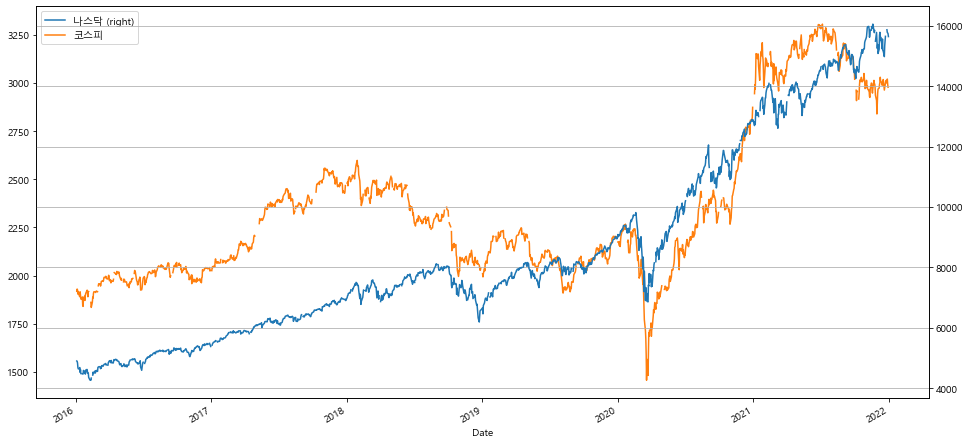

In [43]:
# 2016~2021 코스피/나스닥 일별 데이터 선 그래프

df[['나스닥', '코스피']].plot(secondary_y=['나스닥'])

<AxesSubplot:xlabel='Date'>

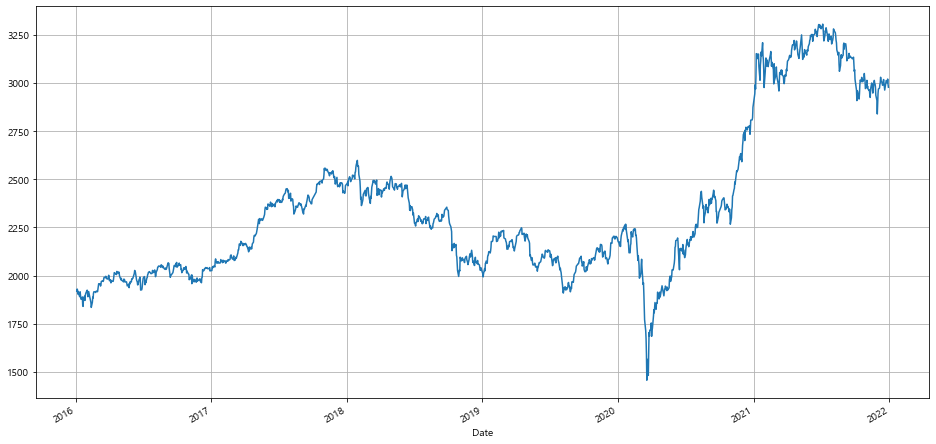

In [44]:
Nasdaq = pd.read_csv("C:/Users/acorn/Desktop/송정우강사/파이널프로젝트 1,4팀/data/2016_2021_나스닥.csv", encoding="euc-kr", thousands=",")
Nasdaq

ks11 = fdr.DataReader('KS11', '2016-01-04', '2021-12-31',data_source='close')
ks11['Close'].plot()

In [18]:
Nasdaq.head()

Date   Close    Volume  Change
0  2016-01-04  677.79  502710.0 -0.0067
1  2016-01-05  684.07  741690.0  0.0093
2  2016-01-06  687.27  747610.0  0.0047
3  2016-01-07  679.66  692150.0 -0.0111
4  2016-01-08  682.56  710750.0  0.0043

In [45]:
Nasdaq['Date'] = pd.to_datetime(Nasdaq['Date'])
Nasdaq['Date']

0      2016-01-04
1      2016-01-05
2      2016-01-06
3      2016-01-07
4      2016-01-08
          ...    
1470   2021-12-24
1471   2021-12-27
1472   2021-12-28
1473   2021-12-29
1474   2021-12-30
Name: Date, Length: 1475, dtype: datetime64[ns]

In [46]:
Nasdaq['YearMonth'] = Nasdaq['Date'].dt.to_period('M')
Nasdaq_month = Nasdaq.groupby('YearMonth').mean().reset_index()
Nasdaq_month
# Nasdaq_month = [g for n, g in Nasdaq.set_index('Date').groupby(pd.Grouper(freq='m'))]
# Nasdaq_month
# coLname = ['columb name']
# Nasdaq_month = [g for n, g in Nasdaq.set_index('Date').groupby(pd.Grouper(freq='m'))]
# 리스트는 plot을 사용 할 수 없으니# 리스트를 데이터 프레임으로 변환한다d
# df_list = pd.DataFrame(Nasdaq_month)
# df_list.value_counts()

# plt.plot(df_list, marker = '*', color = 'r')
# plt.show()

YearMonth        Close        Volume    Change
0    2016-01   678.811500  6.141055e+05  0.000080
1    2016-02   651.046667  5.388311e+05 -0.002344
2    2016-03   684.440000  5.988873e+05  0.002514
3    2016-04   697.671500  6.730035e+05  0.000835
4    2016-05   693.606000  7.273800e+05 -0.000065
..       ...          ...           ...       ...
67   2021-08  1029.975238  1.286834e+09  0.000424
68   2021-09  1035.891053  1.290956e+09 -0.001758
69   2021-10   980.638947  1.312632e+09 -0.000426
70   2021-11  1010.570909  1.209268e+09 -0.001173
71   2021-12  1004.647727  1.148562e+09  0.003150

[72 rows x 4 columns]

In [47]:
Nasdaq_month.head()

YearMonth       Close         Volume    Change
0   2016-01  678.811500  614105.500000  0.000080
1   2016-02  651.046667  538831.111111 -0.002344
2   2016-03  684.440000  598887.272727  0.002514
3   2016-04  697.671500  673003.500000  0.000835
4   2016-05  693.606000  727380.000000 -0.000065

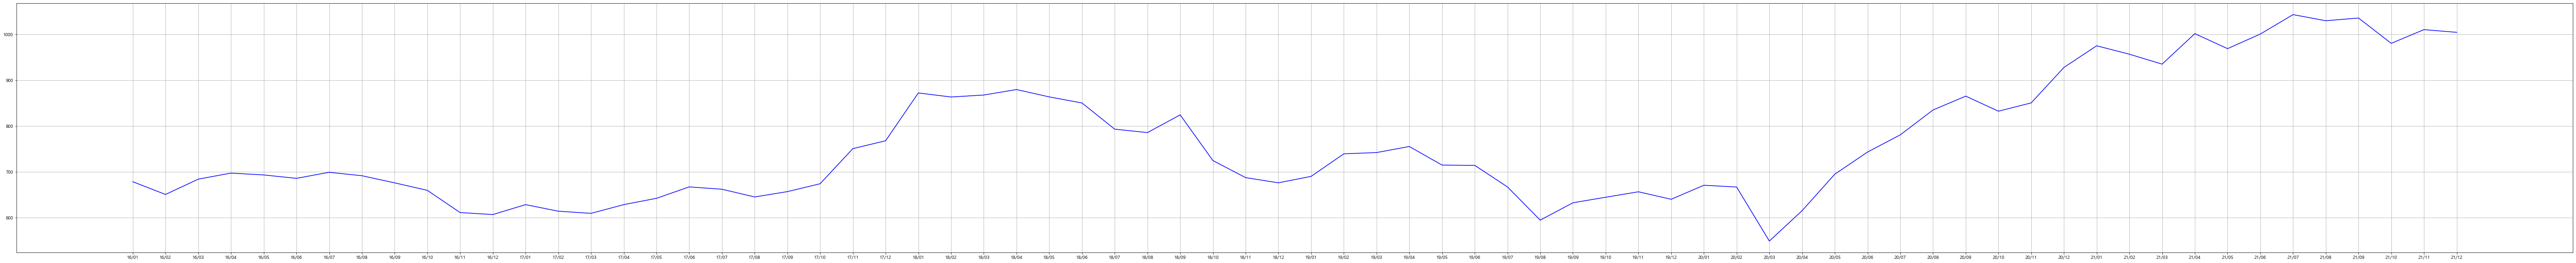

In [48]:
fig, axes = plt.subplots(1, 1, figsize=(100, 10))
axes.plot(Nasdaq_month['YearMonth'].dt.strftime('%y/%m'), Nasdaq_month['Close'], 'b')
# for i, title in enumerate(['Close']):
#     axes[i].set_title(title)
plt.show()

In [24]:
?plt

In [49]:
Nasdaq['YearMonth'] = Nasdaq['Date'].dt.to_period('d')
Nasdaq_day = Nasdaq.groupby('YearMonth').mean().reset_index()
Nasdaq_day

YearMonth    Close        Volume  Change
0     2016-01-04   677.79  5.027100e+05 -0.0067
1     2016-01-05   684.07  7.416900e+05  0.0093
2     2016-01-06   687.27  7.476100e+05  0.0047
3     2016-01-07   679.66  6.921500e+05 -0.0111
4     2016-01-08   682.56  7.107500e+05  0.0043
...          ...      ...           ...     ...
1470  2021-12-24  1007.42  1.240000e+09  0.0041
1471  2021-12-27  1011.36  1.150000e+09  0.0039
1472  2021-12-28  1027.44  1.290000e+09  0.0159
1473  2021-12-29  1028.05  9.509400e+08  0.0006
1474  2021-12-30  1033.98  9.074200e+08  0.0058

[1475 rows x 4 columns]

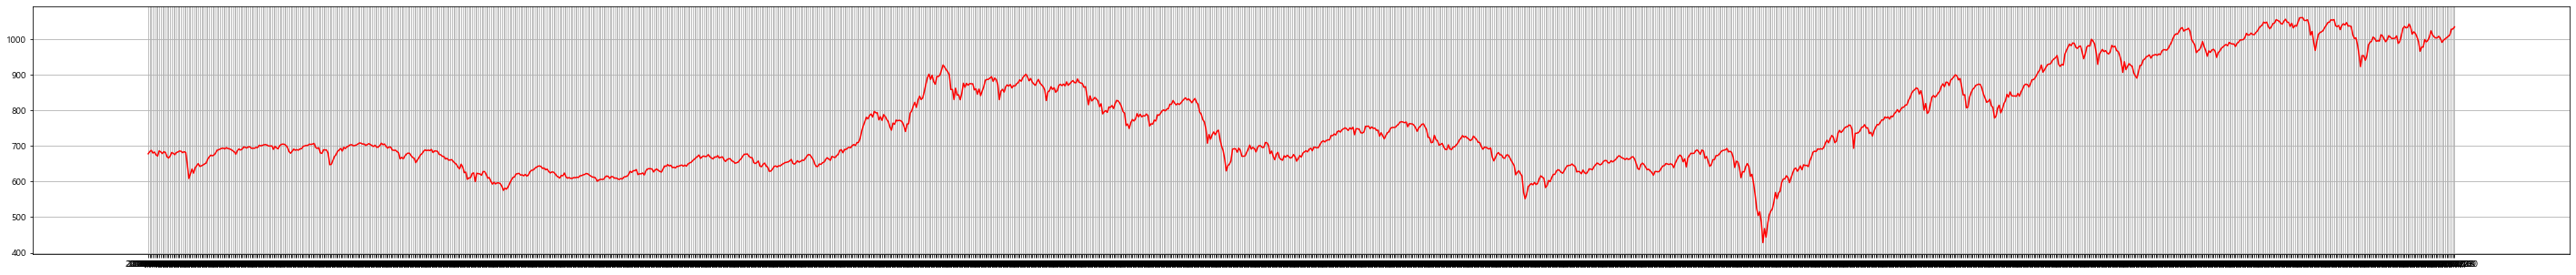

Object `plot` not found.


In [60]:
fig, axes = plt.subplots(1, 1, figsize=(50, 5))
axes.plot(Nasdaq_day['YearMonth'].dt.strftime('%Y/%m/%d'), Nasdaq_day['Close'], 'r')
plt.show()
?plot

In [52]:
## 연별로 출력 dt.to_period('Y')
## 나스닥

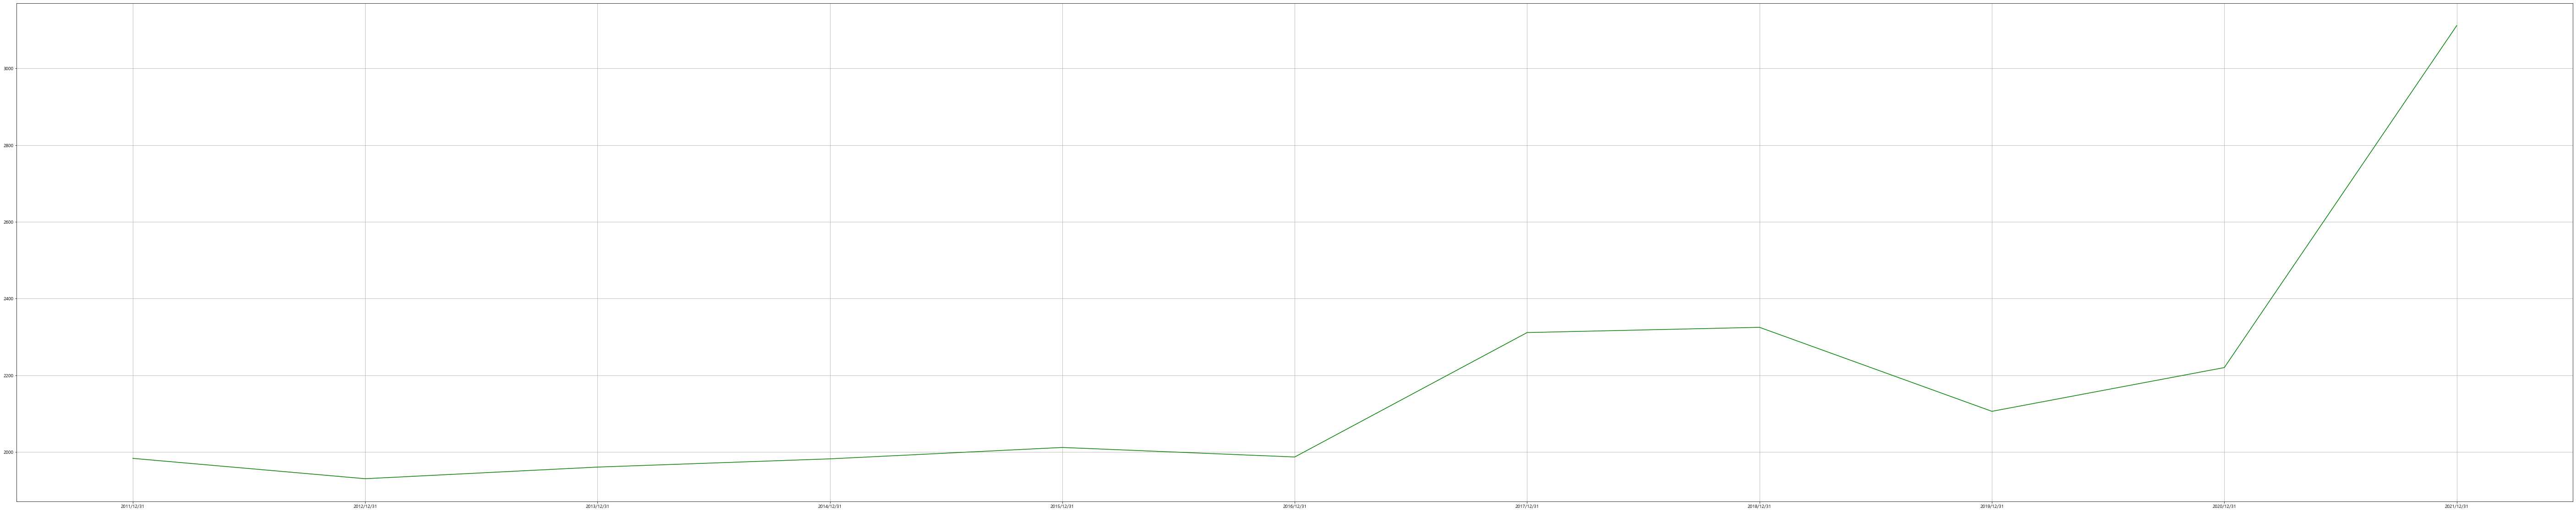

In [73]:
Nasdaq['YearMonth'] = Nasdaq['Date'].dt.to_period('Y')
Nasdaq_year = Nasdaq.groupby('YearMonth').mean().reset_index()
Nasdaq_year

fig, axes = plt.subplots(1, 1, figsize=(100, 20))
axes.plot(Nasdaq_year['YearMonth'].dt.strftime('%Y/%m/%d'), Nasdaq_year['Close'], 'g')
plt.show()

In [106]:
# df = fdr.DataReader('KS11', '2011-01-01', '2021-12-31')
# df_kr = df.drop(['Low','High','Open'], axis=1)
# df_kr

# df_kr.to_csv("10년치 코스피.csv")

# df = fdr.DataReader('KQ11', '2011-01-01', '2021-12-31')
# df.drop(['Open'], axis=1)
# df.drop(['High'], axis=1)
# df_na = df.drop(['Low','High','Open'], axis=1)
# df_na

# df_na.to_csv("10년치 나스닥.csv")

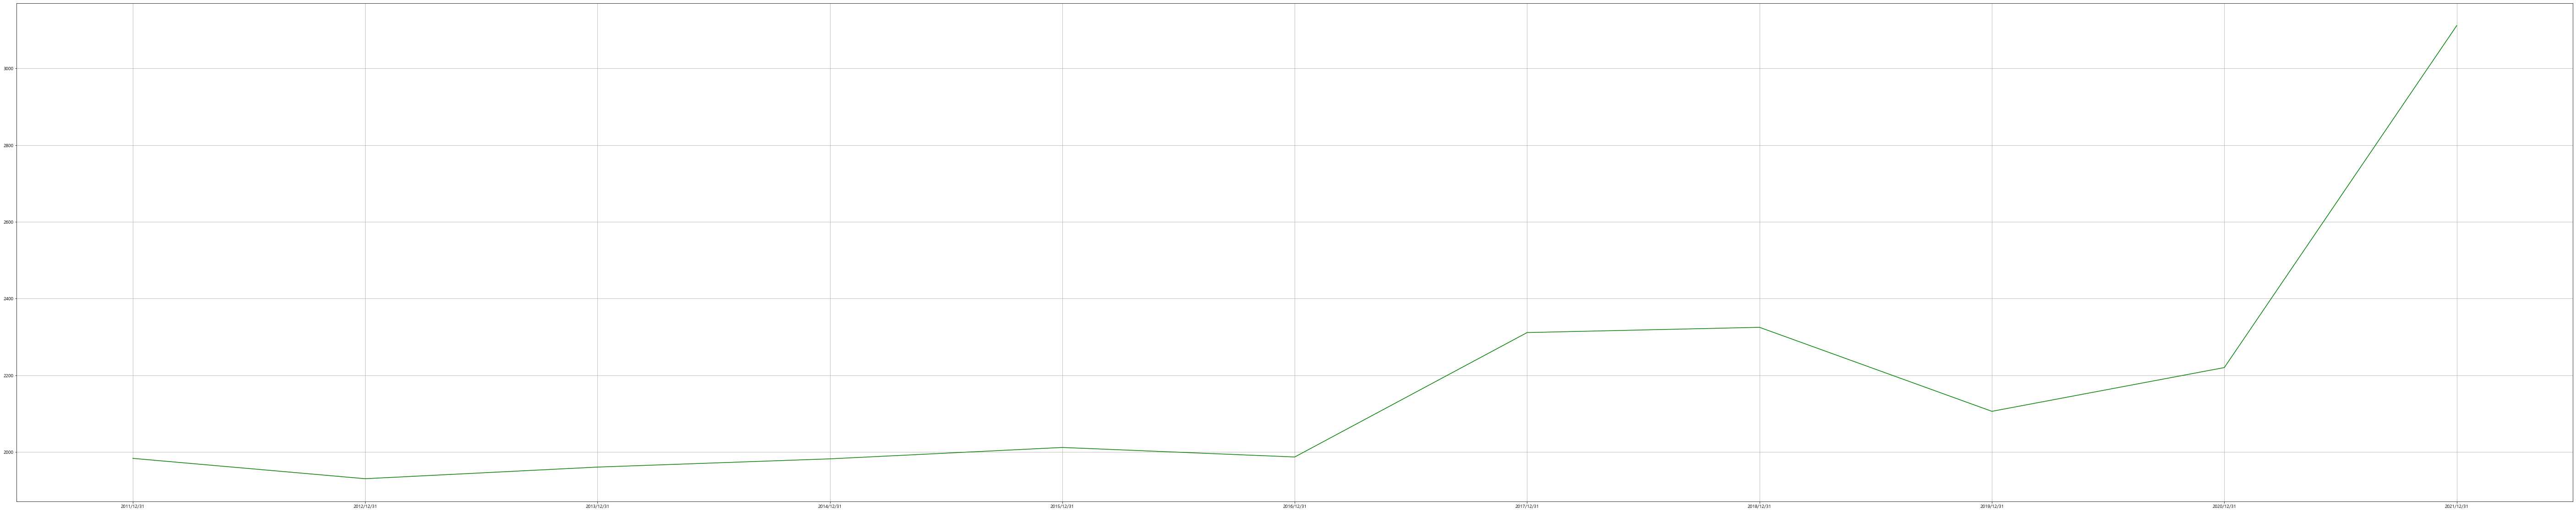

In [66]:
Nasdaq = pd.read_csv("C:/Users/acorn/Desktop/송정우강사/파이널프로젝트 1,4팀/data/10_코스피10년치.csv", encoding="euc-kr", thousands=",")
Nasdaq['Date'] = pd.to_datetime(Nasdaq['Date'])

Nasdaq['YearMonth'] = Nasdaq['Date'].dt.to_period('Y')
Nasdaq_year = Nasdaq.groupby('YearMonth').mean().reset_index()
Nasdaq_year

fig, axes = plt.subplots(1, 1, figsize=(100, 20))
axes.plot(Nasdaq_year['YearMonth'].dt.strftime('%Y/%m/%d'), Nasdaq_year['Close'], 'g')
plt.show()


In [74]:
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in kr_stock_ratio] 
df.head(10)

NameError: name 'kr_stock_ratio' is not defined

In [10]:
df_KOSPI = fdr.StockListing('KOSPI')

tiker_list= list(df_KOSPI.Symbol)
tiker_list

['095570',
 '006840',
 '152100',
 '295820',
 '253150',
 '253160',
 '395750',
 '395760',
 '278420',
 '429740',
 '292750',
 '309210',
 '333940',
 '333950',
 '333960',
 '333970',
 '333980',
 '269530',
 '433850',
 '433860',
 '433870',
 '433880',
 '421320',
 '251590',
 '161510',
 '251600',
 '289670',
 '298340',
 '189400',
 '419650',
 '415920',
 '278620',
 '429760',
 '269540',
 '287180',
 '213630',
 '332610',
 '426410',
 '332620',
 '195970',
 '238670',
 '195980',
 '373530',
 '256450',
 '239660',
 '280920',
 '266550',
 '301400',
 '301410',
 '227830',
 '122090',
 '328370',
 '301440',
 '376250',
 '027410',
 '282330',
 '138930',
 '001460',
 '001465',
 '001040',
 '079160',
 '00104K',
 '000120',
 '011150',
 '011155',
 '001045',
 '097950',
 '097955',
 '000590',
 '012030',
 '016610',
 '005830',
 '000990',
 '000995',
 '139130',
 '001530',
 '000210',
 '001880',
 '000215',
 '375500',
 '37550L',
 '37550K',
 '007340',
 '004840',
 '155660',
 '069730',
 '017940',
 '365550',
 '383220',
 '007700',
 '285690',

In [ ]:
stock_list = [
  ["나스닥", "IXIC"],
  ["코스피", "ks11"],
]

In [ ]:
df_list = [fdr.DataReader(code, '2016-01-04', '2021-12-31')['Close'] for name, code in stock_list]
len(df_list)

In [ ]:
# pd.concat()로 합치기

df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list]
df.head(10)

In [68]:
def stock_code(val):
    df_kospi = fdr.StockListing("KOSPI")
    name = df_kospi[df_kospi['Name']==val]
    symbol = name.iloc[0,0]
    return symbol

In [72]:
#종목이름 입력시 해당 종목의 주식코드번호 생성
stock_code('삼성전자')

'005930'

In [75]:
stock_list = [
  ["코스피", "KS11"],
  ["셀트리온", stock_code("셀트리온")],
]
print(stock_list)

[['코스피', 'KS11'], ['셀트리온', '068270']]


In [76]:
df_list = [fdr.DataReader(code, '2016-01-04', '2021-12-31')['Close'] for name, code in stock_list]

In [77]:
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list] 
df.head(10)

코스피   셀트리온
Date                      
2016-01-04  1918.76  76803
2016-01-05  1930.53  77750
2016-01-06  1925.43  78956
2016-01-07  1904.33  78956
2016-01-08  1917.62  83088
2016-01-11  1894.84  85413
2016-01-12  1890.86  84208
2016-01-13  1916.28  90495
2016-01-14  1900.01  89547
2016-01-15  1878.87  85413

<AxesSubplot:xlabel='Date'>

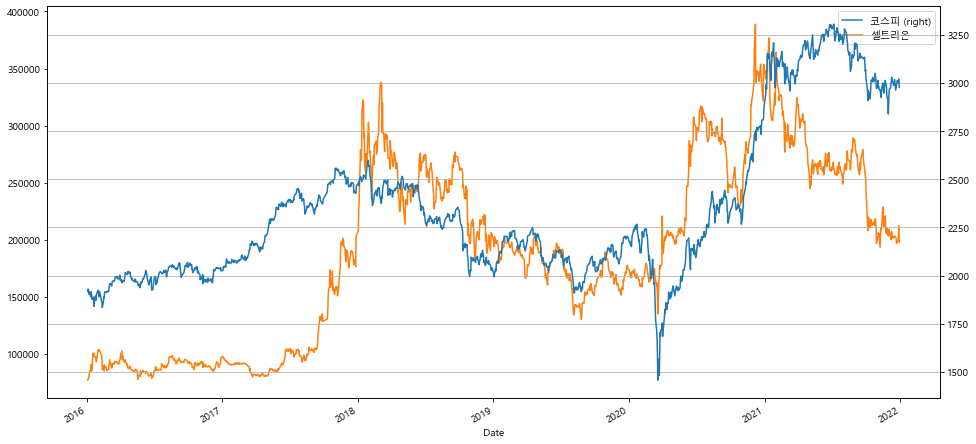

In [78]:
df[['코스피', '셀트리온']].plot(secondary_y=['코스피'])